In [3]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [6]:
#path to train and test data
train_path = r'./dataset/'
test_path = r'./dataset/'

In [8]:
#read treain and test data
train_data = pd.read_csv(train_path +'train.csv')
test_data = pd.read_csv(test_path + 'test.csv')

In [10]:
train_data.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [11]:
test_data.head(5)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


**NB: train and test data have the same number of columns however test data does not contain the target variable which is price range but instead contains an id column. train data on the other hand contains the target variable but does not contain the id column**

In [22]:
#check quick info on  training data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

/home/alahirajeffrey/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_range', ylabel='count'>

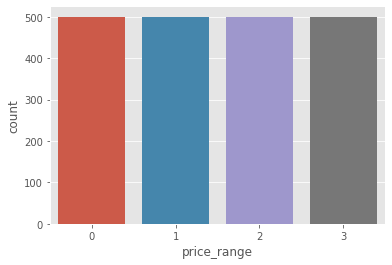

In [57]:
##check class balance of target variable
sns.countplot(train_data['price_range'])

**NB: train data is already in integer datatype and the target class is balanced therefore we can move on to modeling to get a baseline model**

In [38]:
#set x and y variables
x = train_data.drop(labels ='price_range', axis = 1)
y = train_data['price_range'].values.reshape(-1,1)

In [39]:
#scale x variables
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
x_scaled = standard_scaler.fit_transform(x)

In [44]:
#train test splt
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled,y, train_size=0.75, random_state= 10, )

In [45]:
#modeling
from sklearn.linear_model import LogisticRegression

#inititalize logistic regression algorithm and fit
lr = LogisticRegression()
lr.fit(x_train, y_train)

#predict values using trained model
lr_preds = lr.predict(x_test)

/home/alahirajeffrey/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [54]:
#check metrics
from sklearn.metrics import accuracy_score,classification_report

print(classification_report(y_test, lr_preds))
print(f'\n Accuacy score : {accuracy_score(y_test, lr_preds)}')

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       118
           1       0.92      0.95      0.94       126
           2       0.97      0.91      0.94       134
           3       0.98      0.98      0.98       122

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500


 Accuacy score : 0.956


**NB: From the classification report and accuracy score, the model does an almost excellent job of predicting the prices of phones. Further preprocessing of data might however do a better job**